# Problem Scoping

Prediksi Body Fat Percentage menggunakan data Body Fat

# Data Acquisition

## Import Data

In [1]:
import pandas as pd

In [2]:
# Sumber Data dari Kaggle (https://www.kaggle.com/fedesoriano/body-fat-prediction-dataset)
data = pd.read_csv('../data/bodyfat.csv')

# Data Preparation

In [3]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Check Missing Value

In [4]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Data tidak memiliki missing value

## Describe Data

In [5]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# Data Exploration

The variables listed below, from left to right, are:

1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

## Linear Correlation with Scatter Plot

In [6]:
import seaborn as sns

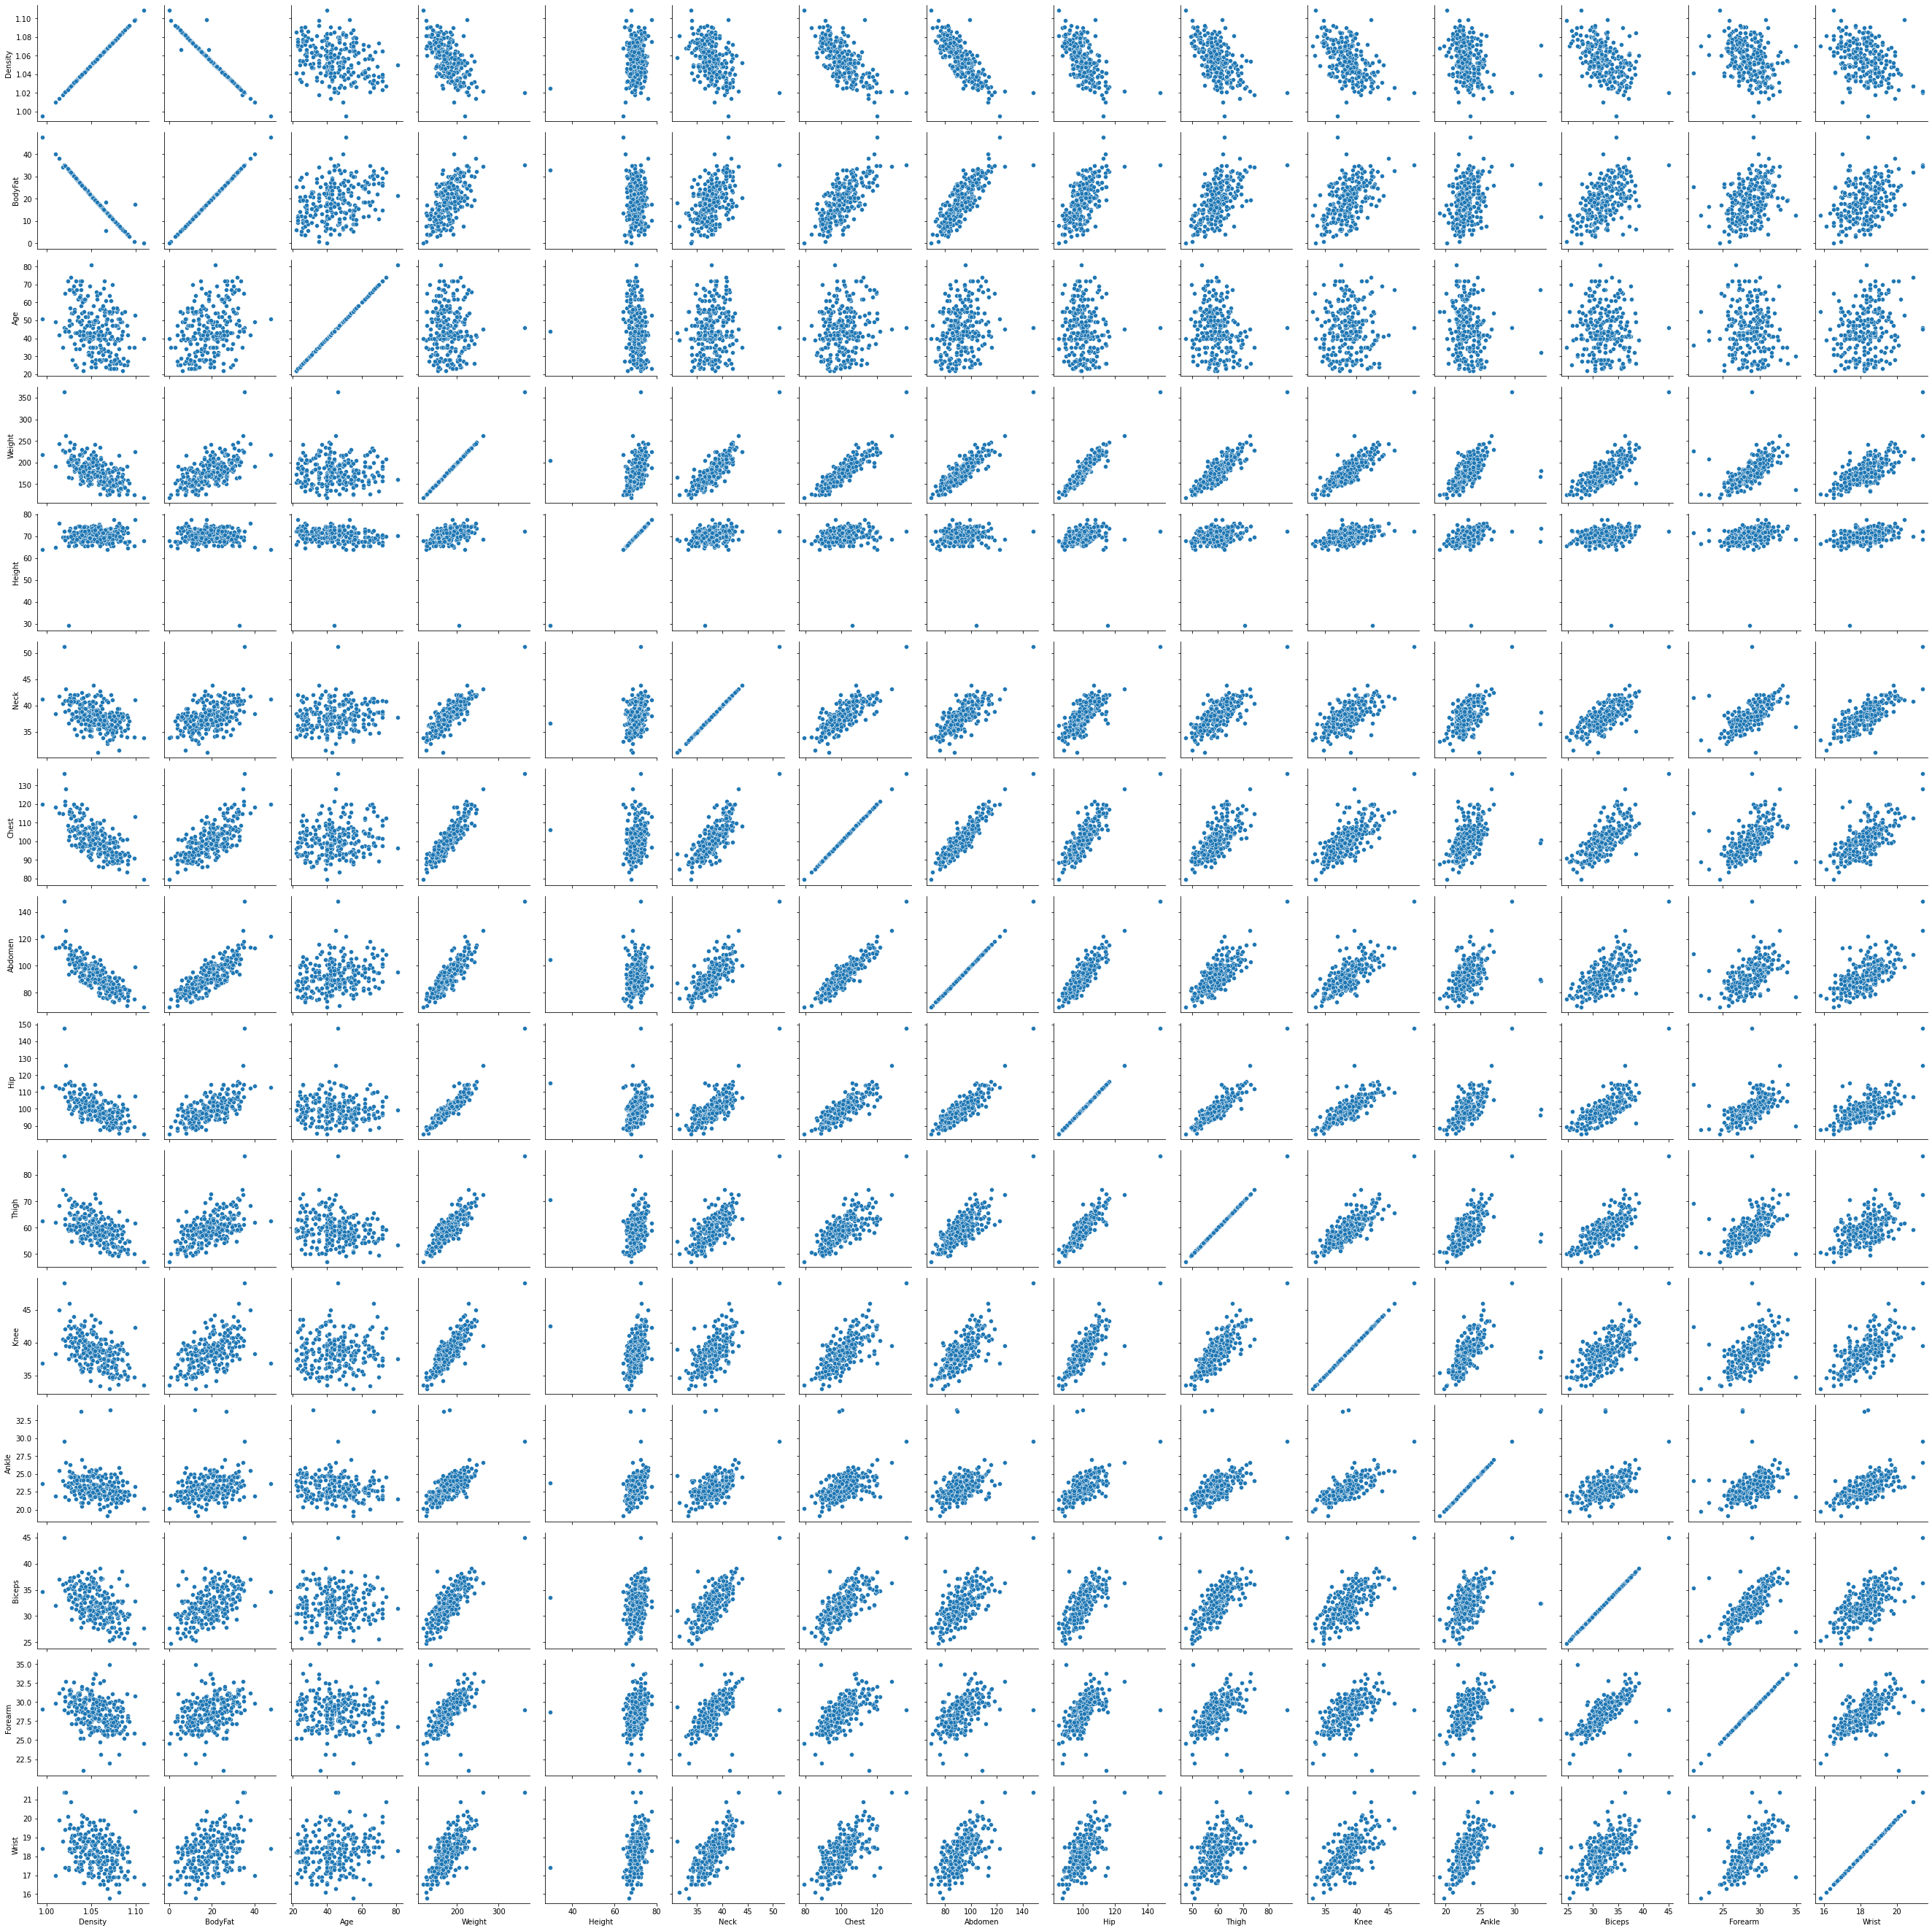

In [7]:
sns.PairGrid(data).map(sns.scatterplot)

Dari scatterplot diatas dapat diketahui beberapa fitur yang memiliki hubungan linier yang cukup besar dengan Body Fat antara lain Density, Weight, Chest, Abdomen, Hip Thigh, Biceps

## Spearman’s Rank Correlation

In [8]:
from scipy.stats import spearmanr

In [9]:
alpha = 0.05
for feature in data.columns:
    coef, p = spearmanr(data[feature], data['BodyFat'])
    #print('Spearmans correlation coefficient (' + feature + ' and Body Fat ): %.3f' % coef)

    if coef > 0.5 or coef < -0.5:
        print(feature + ' dan Body Fat berkorelasi kuat coef : %.3f' % coef)
        

Density dan Body Fat berkorelasi kuat coef : -0.993
BodyFat dan Body Fat berkorelasi kuat coef : 1.000
Weight dan Body Fat berkorelasi kuat coef : 0.613
Chest dan Body Fat berkorelasi kuat coef : 0.674
Abdomen dan Body Fat berkorelasi kuat coef : 0.816
Hip dan Body Fat berkorelasi kuat coef : 0.612
Thigh dan Body Fat berkorelasi kuat coef : 0.545


# Modelling

## Feature Selection

In [10]:
col_used = ['Density', 'BodyFat', 'Weight', 'Chest', 'Abdomen', 'Hip', 'Thigh']

df = data[col_used]
df.head()

,Density,BodyFat,Weight,Chest,Abdomen,Hip,Thigh
0,1.0708,12.3,154.25,93.1,85.2,94.5,59.0
1,1.0853,6.1,173.25,93.6,83.0,98.7,58.7
2,1.0414,25.3,154.00,95.8,87.9,99.2,59.6
3,1.0751,10.4,184.75,101.8,86.4,101.2,60.1
4,1.0340,28.7,184.25,97.3,100.0,101.9,63.2


## Split Data

In [11]:
X = df[['Weight', 'Chest', 'Abdomen']]
y = df['BodyFat']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [14]:
X_train.head()

,Weight,Chest,Abdomen
156,205.75,105.6,105.0
6,181.00,105.1,90.7
53,152.75,93.3,79.6
59,179.75,104.8,98.3
48,135.75,92.3,83.4


In [15]:
X_test.head()

,Weight,Chest,Abdomen
243,227.75,115.8,113.4
212,168.25,98.3,89.7
217,154.50,93.3,81.5
117,179.00,99.2,90.0
37,196.75,105.6,98.8


In [16]:
y_train.head()

156    31.2
6      19.2
53      6.3
59     24.6
48     13.6
Name: BodyFat, dtype: float64

In [17]:
y_test.head()

243    32.6
212    19.5
217     7.5
117    13.9
37     28.4
Name: BodyFat, dtype: float64

## Train Model

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_lr}')
print(f'RMSE: {rmse_lr}')

R2 : 0.707819461432678
RMSE: 4.355018201147581


### SVR

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr = svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

r2_score_svr = r2_score(y_test, y_pred)
rmse_svr = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_svr}')
print(f'RMSE: {rmse_svr}')


R2 : 0.49897393229849996
RMSE: 5.702883409274205


### Bayesian Ridge

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)

y_pred = ridge.predict(X_test)

r2_score_ridge = r2_score(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_ridge}')
print(f'RMSE: {rmse_ridge}')

R2 : 0.7078494438228358
RMSE: 4.354794748200639


In [21]:
logs = {
    'Name' : ['Linear Regression', 'SVR', 'Ridge'],
    'r^2 Score' : [r2_score_lr, r2_score_svr, r2_score_ridge],
    'rmse' : [rmse_lr, rmse_svr, rmse_ridge]
}

logs_df = pd.DataFrame(logs)
logs_df

,Name,r^2 Score,rmse
0,Linear Regression,0.707819,4.355018
1,SVR,0.498974,5.702883
2,Ridge,0.707849,4.354795


# Save & Load Model

## Save Model

In [28]:
import pickle
pickle.dump(svr, open('../model.pkl', 'wb'))

## Load Model

In [30]:
loaded_model = pickle.load(open('../model.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.49897393229849996